# *Homework 3*
# Problem 1: Logistic Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
np.random.seed(0)

np.random.seed(0)
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get the first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly 
X,_ = ml.transforms.rescale(X) # rescale the data and centering it

XA, YA = X[Y<2, :], Y[Y<2] # get class 0 and 1
XB, YB = X[Y>0, :], Y[Y>0] # get class 1 vs 2


In [2]:
YB

array([2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2.,
       1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1.,
       1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2.,
       1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1.,
       2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1.,
       2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2.])

## Question 1 

Text(0, 0.5, 'feature 2')

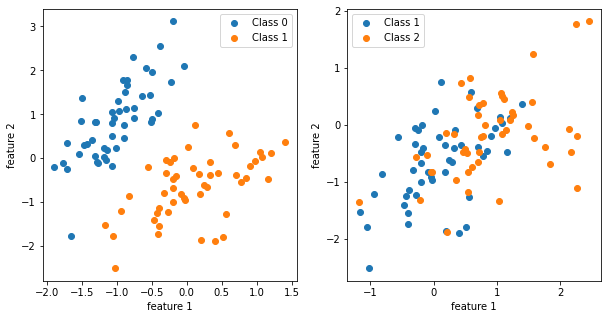

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(0,2):
    ax[0].scatter(XA[YA==i,0], XA[YA==i,1], label = 'Class %s' % str(i))
    ax[0].legend()
ax[0].set_xlabel('feature 1')
ax[0].set_ylabel('feature 2')

for i in range(1,3):
    ax[1].scatter(XB[YB==i,0], XB[YB==i,1], label = 'Class %s' % str(i))
    ax[1].legend()
ax[1].set_xlabel('feature 1')
ax[1].set_ylabel('feature 2')

It's obvious that Class 0 vs. Class 1 is linearly seperable, but Class 1 vs. Class 2 is not. 

## Question 2

line of code added to the code (solving for x2 as a function of x1 when setting the equation to 0)

x2b = (-self.theta[0]-self.theta[1]*x1b)/self.theta[2]

Text(0.5, 1.0, 'Class 1 vs. Class 2')

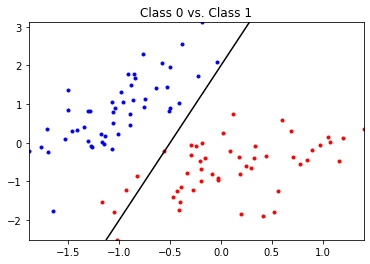

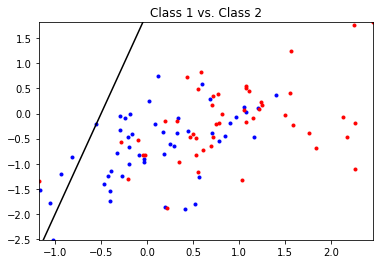

In [4]:
from logisticClassify2 import *

plt.figure()
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,1,-0.25]); # TODO: fill in values
learner.theta = wts; # fill in the theta values
learner.plotBoundary(XA,YA)
plt.title('Class 0 vs. Class 1')


plt.figure()
learner.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.5,1.,-0.25]); # TODO: fill in values
learner.theta = wts; # set the learner's parameters
learner.plotBoundary(XB,YB)
plt.title('Class 1 vs. Class 2')

## Question 3

    def predict(self, X):
        """ Return the predictied class of each data point in X"""
        raise NotImplementedError
        ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
        Yhat = np.zeros(len(X))
        for i in range(0,len(X)):
            r[i] = self.theta[0] + self.theta[1]*X[i,1] + self.theta[2]*X[i,2]
            if r[i] > 0:
                Yhat[i] =self.classes[1]
            else:
                Yhat[i] = self.classes[0]
        return Yhat

In [5]:
learner = logisticClassify2()
wts = np.array([0.5,1.,-0.25])
learner.theta = wts; # set the learner's parameters
ErrorA = learner.err(XA,YA)
print('Errors for set A:', ErrorA)

learner.classes= np.unique(YB)
ErrorB = learner.err(XB,YB)
print('Errors for set B:', ErrorB)

# print ()"classifier error rate on dataset A:",learner.err(XA, YA) 
# print
# print "classifier error rate on dataset B:", learner.err(XB, YB-1) 
# ## Since YB initial class values are 1 and 2


Errors for set A: 0.050505050505050504
Errors for set B: 0.46464646464646464


## Question 4

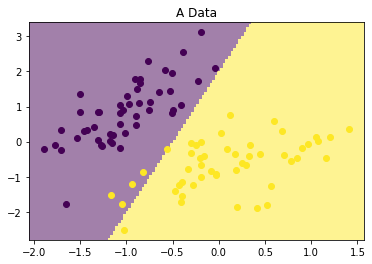

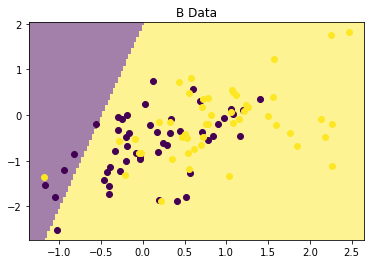

In [6]:
plt.title('A Data')
ml.plotClassify2D(learner, XA,YA)


plt.title('B Data')
ml.plotClassify2D(learner, XB,YB)


The deicision boundary is the same as the boundary calculated by solving for x2. 

## Question 5

![title](hw5.png)

## Question 6

    def train(self, X, Y, initStep=0.2, stopTol=1e-4, stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[0.2]; J01=[0.2];
        def sigma(x):
            return 1/(1+np.exp(-x))
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri    = self.theta@XX[i,:];     # TODO: compute linear response r(x)
                gradi = (-YY[i] + sigma(ri)) * XX[i,:]     # TODO: compute gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step

            J01.append(self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            jsur = 0
            for i in np.random.permutation(M):
                jsur += -YY[i]*np.log(sigma(self.theta@XX[i,:]))-(1-YY[i])*np.log(1-sigma(self.theta@XX[i,:]))
            Jsur = jsur/M

            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            Jnll.append(Jsur) # TODO evaluate the current NLL loss
            # plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            # if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            # plt.pause(.01);                    # let OS draw the plot

            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            if epoch > stopEpochs or np.abs(Jnll[-1] - Jnll[-2]) < stopTol:
                done = True   # or if Jnll not changing between epochs ( < stopTol )
        # plt.figure(3)
        #
        #
        # plt.draw()
        plt.figure(3); plt.plot(Jnll,'b-',J01,'r-'); plt.title('Losses');plt.draw();    # plot losses
        plt.figure(4);plt.title('Converged');self.plotBoundary(X,Y); plt.draw();


## Question 7

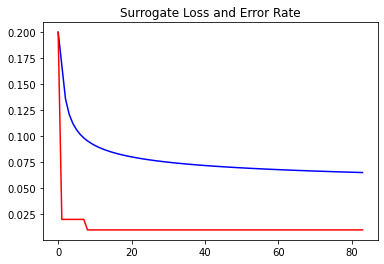

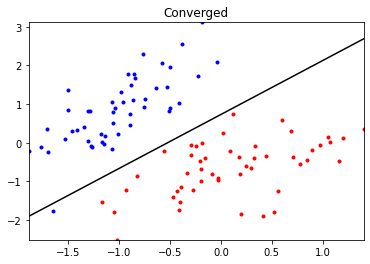

In [7]:
learner.train(XA,YA,initStep=.1,  stopTol=1e-4,stopEpochs=5000)

I chose step size at 0.1, as it can demonstrate how the loss function converges and the error rate gradully change over the epochs. When the step size it too big, we can't see the gradual change as clearly. 

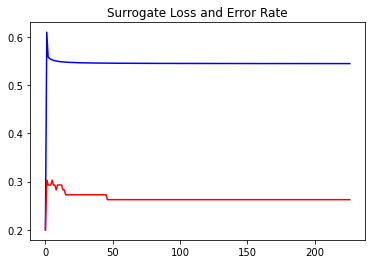

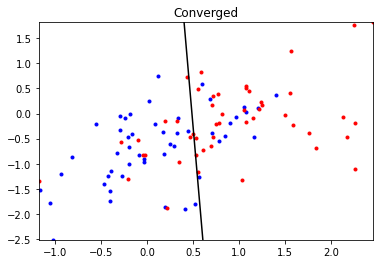

In [8]:
learner.train(XB,YB,initStep=.1,  stopTol=1e-6,stopEpochs=5000)

The learning rate wasn't set to 0.1. The stopTol was set to 1e-6 just to see whether the error rate could be reduced more. 

# Question 8

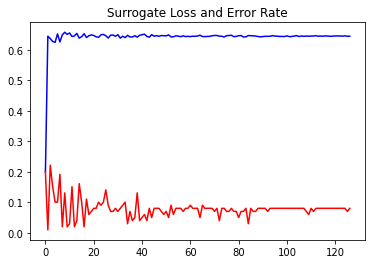

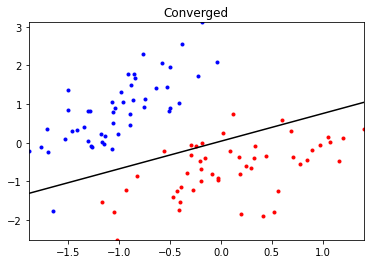

In [9]:
learner.trainl2(XA,YA,initStep=.2,  alpha = 2,stopTol=1e-4,stopEpochs=5000)

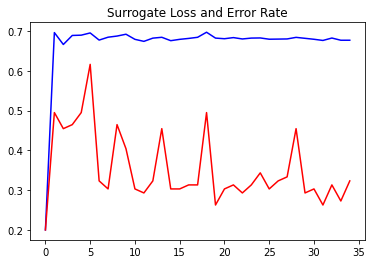

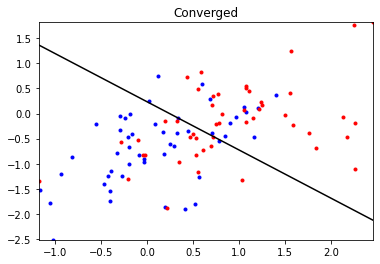

In [10]:
learner.trainl2(XB,YB,initStep=.2,  alpha = 2,stopTol=1e-4,stopEpochs=5000)

# Problem 2: Shattering and VC Dimension

1) $T(a+bx_1))$ is a line where x2 is not a function of x1, so the line is only defined by x1, making the classifier a vertical line . Therefore, it could shatter (a), because it's just a point. It could also shatter(b), because the two points are not on a line. It can't shatter (c). For example, it would fail to seperate the upper one point from the other two. It can't shatter (d) either. For example, it can't seperate the two points that have the longest distance fromt the rest of the points. VC dim is 2.

2) $T((a*b)x_1+(c/a)x_2))$ is a two-dimensional line, and it passes through the origin. Therefore, it can shatter (a) and (b), but not the rest. VC dim is 2.

3) $T((x_1-a)^2+(x_2-b)^2+c)$ is a circle, where the circle and radius could both change. Therefore, it could shatter (a)(b)(c), but not (d), as it can't classify the two points that have the longest distance fromt the rest of the points. VC dim is 3.

4) $T((a+bx_1+cx_2)+T(d+bx_1+cx_2)$ are two parallel lines, so it could shatter all four of the datasets. VC dim is >=4.

# Statement of Collaboration

This is the Statement of Collaboration,meaning that I have followed the academic honesty guidelines and did not discussed this assignment with anyone.

Qinhua Sun